# Differentialen 

In dit markdown document staan de modellen en voorbeelden in een. <br>
Er zijn een paar modellen uitgewerkt.<br>
Hieronder staat ze allemaal in een grafiek geplot zo dicht mogelijk bij de voorbeeld. <br>
Je kunt zelf je eigen data gebruiken. Het is wel aangeraden om verstand te hebben van de modellen en welke parameters goed zijn om mee te geven.<br>


Model: Logistic
AIC: -226.79
BIC: -223.17
RMSE: 0.0770
Mean Residual: 0.0039
Model: Gompertz
AIC: -245.09
BIC: -241.47
RMSE: 0.0628
Mean Residual: 0.0332
Model: Von Bertalanffy
AIC: -154.94
BIC: -151.33
RMSE: 0.1710
Mean Residual: 0.0701
Model: Mendelsohn
AIC: -197.52
BIC: -193.91
RMSE: 0.1066
Mean Residual: -0.0448
Model: Montroll
AIC: -172.93
BIC: -167.51
RMSE: 0.1370
Mean Residual: 0.0312
Model: Allee
AIC: -35.09
BIC: -29.67
RMSE: 0.6334
Mean Residual: 0.5200


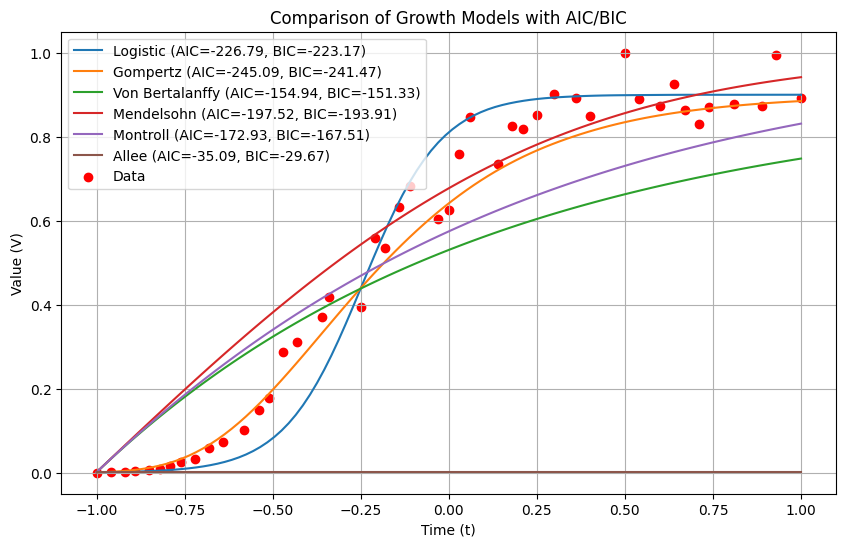

AIC values for each model:
Logistic: AIC = -226.79
Gompertz: AIC = -245.09
Von Bertalanffy: AIC = -154.94
Mendelsohn: AIC = -197.52
Montroll: AIC = -172.93
Allee: AIC = -35.09

BIC values for each model:
Logistic: BIC = -223.17
Gompertz: BIC = -241.47
Von Bertalanffy: BIC = -151.33
Mendelsohn: BIC = -193.91
Montroll: BIC = -167.51
Allee: BIC = -29.67


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# importeer de benodigde modules

# logistic model 
def LogisticModel(t, V, r, K):
    return r * V * (1 - V / K)

# gompertz model
def GompertzModel(t, V, a, b):
    return a * V * np.log(b / V)

# von bertalanffy model
def VonBertalanffyModel(t, V, a, b):
    return a * (1 - (V / b))

# mendelsohn model
def MendelsohnModel(t, V, a, b):
    return a * (1 - V) * np.exp(b * V)

# montroll model
def MontrollModel(t, V, a, K, b):
    return a * (K - V) * np.exp(b * V)

# allee model 
def AlleeModel(t, V, a, V_min, V_max):
    return a * V * (V - V_min) * (V_max - V)

# ode solver voor de modellen 
def solve_model(model, params, V0, t_span):
    if V0 <= 0:
        V0 = 0.001  # Voorkom 0 onzin 
    t_eval = np.linspace(t_span[0], t_span[1], 100) # vloeiende lijn maken 
    sol = solve_ivp(model, t_span, [V0], args=tuple(params), t_eval=t_eval) # de solver die hier de ODE's van de modellen oplost 

    if not sol.success:
        print(f"Warning: solve_ivp failed for model {model.__name__}") # kleine waarschuwing voor als de solver niet werkt

    return sol.t, sol.y[0] if sol.y.size > 0 else np.zeros_like(t_eval) # de oplossing van de ODE's


# AIC en BIC berekeningen
def calculate_aic(n, residuals, k):
   
    rss = np.sum(residuals**2)
    return n * np.log(rss / n) + 2 * k

def calculate_bic(n, residuals, k):
   
    rss = np.sum(residuals**2)
    return n * np.log(rss / n) + k * np.log(n)

# Evalutatie van de modells 
def evaluate_model(model_name, residuals, aic, bic, t_data, V_data, V_pred_interp):
   
    # De RMSE (Root Mean Squared Error) berekenen
    rmse = np.sqrt(np.mean(residuals**2))
    
    # print de resultaten
    print(f"Model: {model_name}")
    print(f"AIC: {aic:.2f}")
    print(f"BIC: {bic:.2f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Mean Residual: {np.mean(residuals):.4f}")

# data generen en de modellen vergelijken
def compare_models():
    t_data = np.array([-1.00, -0.96, -0.92, -0.89, -0.85, -0.82, -0.79, -0.76, -0.72, -0.68, 
    -0.64, -0.58, -0.54, -0.51, -0.47, -0.43, -0.36, -0.34, -0.25, -0.21, 
    -0.18, -0.14, -0.11, -0.03, -0.00, 0.03, 0.06, 0.14, 0.18, 0.21, 
    0.25, 0.30, 0.36, 0.40, 0.50, 0.54, 0.60, 0.64, 0.67, 0.71, 0.74, 
    0.81, 0.89, 0.93, 1.00])  # Tijdstippen
    V_data = np.array([ 0.00, 0.0013, 0.0021, 0.0036, 0.0060, 0.0096, 0.0160, 0.0251, 0.0332, 0.0596, 
    0.0727, 0.1025, 0.1485, 0.1771, 0.2863, 0.3115, 0.3700, 0.4192, 0.3945, 0.5577, 
    0.5357, 0.6336, 0.6831, 0.6036, 0.6248, 0.7588, 0.8460, 0.7362, 0.8262, 0.8194, 
    0.8513, 0.9007, 0.8921, 0.8493, 1.00, 0.8901, 0.8726, 0.9255, 0.8637, 0.8296, 
    0.8705, 0.8776, 0.8726, 0.9947, 0.8921])  # Volume (van bijvoorbeeld tumorgrootte, populatie, etc.)

    
    t_span = [-1,1]  # Tijdspanne van -1 tot 1, omdat anders sommige modellen niet werkten 
    V0 = V_data[0]  # begin waarde V

    # dict van de modellen met de parameters 
    models = {
        'Logistic': (LogisticModel, [9, 0.9]), 
    'Gompertz': (GompertzModel, [3, 0.9]),  
    'Von Bertalanffy': (VonBertalanffyModel, [0.8, 0.9]),  
    'Mendelsohn': (MendelsohnModel, [0.8, 0.9]), 
    'Montroll': (MontrollModel, [0.8, 1, 0.2]),  
    'Allee': (AlleeModel, [0.2, 0.001, 1])
    }

    # plot maken 
    plt.figure(figsize=(10, 6))

    # AIC en BIC waarden opslaan 
    aic_values = {}
    bic_values = {}

    for model_name, (model_func, params) in models.items():
        # solve ipv model 
        t, V_pred = solve_model(model_func, params, V0, t_span)

        # Interpoleren 
        V_pred_interp = np.interp(t_data, t, V_pred)

        # residuals berekenen 
        residuals = V_data - V_pred_interp

        # AIC en BIC berekenen 
        n = len(V_data)  # Aantal data punen 
        k = len(params)  # Aaantal parameters 
        aic = calculate_aic(n, residuals, k)
        bic = calculate_bic(n, residuals, k)

        # opslaan BIC En AIC 
        aic_values[model_name] = aic
        bic_values[model_name] = bic

        # Plot ook die in de graph
        plt.plot(t, V_pred, label=f"{model_name} (AIC={aic:.2f}, BIC={bic:.2f})")

        # evaluate model
        evaluate_model(model_name, residuals, aic, bic, t_data, V_data, V_pred_interp)

    # grafiek van alles tonen 
    plt.scatter(t_data, V_data, color="red", label="Data")
    plt.xlabel('Time (t)')
    plt.ylabel('Value (V)')
    plt.title('Comparison of Growth Models with AIC/BIC')
    plt.legend()
    plt.grid(True)
    plt.show()

    # daaronder de AIC printen 
    print("AIC values for each model:")
    for model_name, aic in aic_values.items():
        print(f"{model_name}: AIC = {aic:.2f}")

    print("\nBIC values for each model:")
    for model_name, bic in bic_values.items():
        print(f"{model_name}: BIC = {bic:.2f}")

# run het 
compare_models()


## Verschillende modellen geplot <br>
In de voorbeeld data die ik heb geplot hierboven (range -1 tot 1), is te zien dat 2 modellen er boven uitspringen qua nauwkeurigheid. <br>
Een lagere BIC en AIC score betekent dat het model geschikt is voor gebruik op die data en vergelijkbare data. <br>
AIC staat voor Akaike Information Criterion, dit is een maat voor de kwaliteitsbalans tussen de fit van het model en de complexiteit. Het probeert het beste fit te vinden zonder overfitting. Een lagere AIC betekent dat dit model beter past bij de dataset. Een hoge score betekent dat het model waarschijnlijk te complex is. <br>
BIC staat voor Bayesian Information Criterion, dit komt op het zelfde neer als AIC maar dan met een extra stap <Br>
Het is strenger op het gebied van extra parameters. om overfitting te voorkomen <br>

Zoals te zien in de grafiek hierboven, springen 2 modellen erboven uit. <br>
Logistic en Gompertz, beide hebben een AIC/BIC van dik in de -200- <br>
Dit is ook wel te verwachten omdat beide een sigmoide functie zijn, en dit is hoe biologisch groei vaak loopt. <br>
Hierdoor zou ik voor een van deze 2 modellen kiezen. En dan met name de Gompertz, deze springt er boven uit qua BIC/AIC <Br>
Ook hebben de RMSE root mean square root, dit geeft aan de gemiddelde afstand tussen de werkelijke waardes en de voorspelde waardes van het model. <br> 
Wederom zo laag mogelijk is het best alleen kan deze niet onder de 0. <br>
De mean residual is het gemiddelde tussen de werkelijke en model waarde in totaal. <br>
Ook hier is 0 het best, want dan heb je geen systematische fout in je model <br>

Verder zien we nog dat die Allee model op 0 blijft, dit komt omdat..... nee ik heb geen idee, snap niet waarom dat zo is, veel verschillende parameters gebruikt maar altijd op 0. <br>



AIC: -250.42
BIC: -246.81
RMSE: 0.1577
Mean Residual: 0.0065


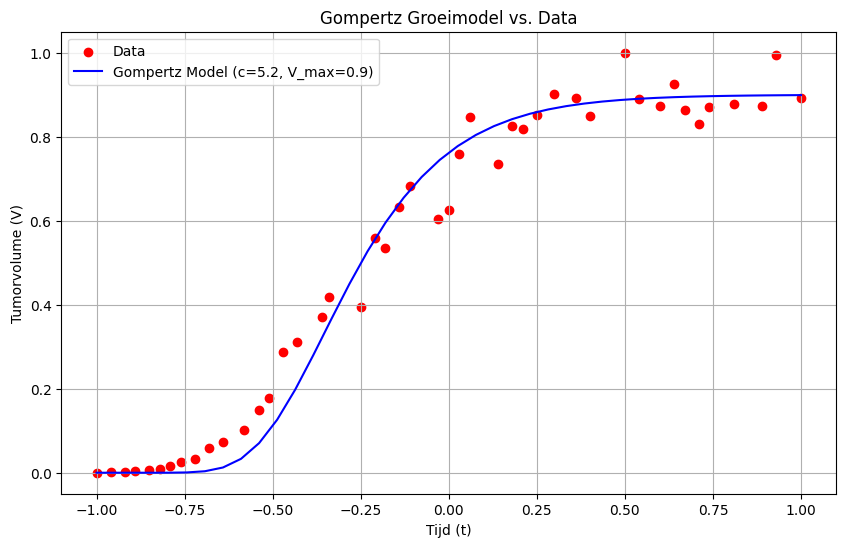

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# gompertz model
def gompertz_model(t, V, c, V_max):
    V = np.maximum(V, 1e-10)  # Zorg ervoor dat V nooit precies 0 is
    return -c * V * np.log(V / V_max)


# runge kutta methode, 4e orde 
def runge_kutta_4(func, t_span, y0, h, c, V_max):
    t0, tf = t_span # begin- en eindtijd
    n_steps = int((tf - t0) / h) # aantal stappen 20
    t_vals = np.linspace(t0, tf, n_steps) # tijdstippen
    y_vals = np.zeros(n_steps) #array voor opslaan volume waardes 
    y_vals[0] = y0 # eerste waarde is 0.
    
    for i in range(1, n_steps):
        t = t_vals[i-1]
        y = y_vals[i-1]
        #vorige waardes gebruiken om nieuwe waardes te berekenen.
        k1 = h * func(t, y, c, V_max)
        k2 = h * func(t + 0.5*h, y + 0.5*k1, c, V_max)
        k3 = h * func(t + 0.5*h, y + 0.5*k2, c, V_max)
        k4 = h * func(t + h, y + k3, c, V_max)
        # k is afgeleide 
        
        y_vals[i] = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        # weging van 1/6 meegeven. 
    return t_vals, y_vals

# Zelfde data als vorige code chunk 
t_data = np.array([-1.00, -0.96, -0.92, -0.89, -0.85, -0.82, -0.79, -0.76, -0.72, -0.68, 
    -0.64, -0.58, -0.54, -0.51, -0.47, -0.43, -0.36, -0.34, -0.25, -0.21, 
    -0.18, -0.14, -0.11, -0.03, -0.00, 0.03, 0.06, 0.14, 0.18, 0.21, 
    0.25, 0.30, 0.36, 0.40, 0.50, 0.54, 0.60, 0.64, 0.67, 0.71, 0.74, 
    0.81, 0.89, 0.93, 1.00])  # Tijdstippen
V_data = np.array([ 0.00, 0.0013, 0.0021, 0.0036, 0.0060, 0.0096, 0.0160, 0.0251, 0.0332, 0.0596, 
    0.0727, 0.1025, 0.1485, 0.1771, 0.2863, 0.3115, 0.3700, 0.4192, 0.3945, 0.5577, 
    0.5357, 0.6336, 0.6831, 0.6036, 0.6248, 0.7588, 0.8460, 0.7362, 0.8262, 0.8194, 
    0.8513, 0.9007, 0.8921, 0.8493, 1.00, 0.8901, 0.8726, 0.9255, 0.8637, 0.8296, 
    0.8705, 0.8776, 0.8726, 0.9947, 0.8921])  # Volume

# parameters defineren 
c = 5.2  # groeisnelheid
V_max = 0.9 # maximaal volume

# Beginwaarde
V0 = V_data[0]

# verschuiven tijd naar de positieve tijdschaal 
t_data_shifted = t_data + 1.0  

# Los de ODE op met de runge kutta methode 
t_span = (t_data_shifted[0], t_data_shifted[-1])
h = 0.05  # stap van 20 per datapunt 
t_vals, V_vals = runge_kutta_4(gompertz_model, t_span, V0, h, c, V_max) # runge kutta aanroepen 

# Interpoleren 
V_pred_interp = np.interp(t_data_shifted, t_vals, V_vals) 

#residuals berekenen
residuals = V_data - V_pred_interp

# Bereken RMSE 
rmse = np.sum(residuals**2)

# Aantal datapunten en parameters
n = len(V_data)  # aantal datapunten
k = 2  # aantal parameters c en v max 

# Bereken AIC en BIC
aic = n * np.log(rmse / n) + 2 * k
bic = n * np.log(rmse / n) + k * np.log(n)

# Print de resultaten
print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")
print(f"RMSE: {rmse:.4f}") 
print(f"Mean Residual: {np.mean(residuals):.4f}")

# Plot de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")
plt.plot(t_vals - 1.0, V_vals, label=f"Gompertz Model (c={c}, V_max={V_max})", color="blue")  # Verplaats t_vals terug naar de oorspronkelijke tijdschaal
plt.xlabel("Tijd (t)")
plt.ylabel("Tumorvolume (V)")
plt.title("Gompertz Groeimodel vs. Data")
plt.legend()
plt.grid(True)
plt.show()



## Runge kutta <br>
Hier is 1 model uitgelicht, het beste model, het gompertz model. <Br>
Op de zelfde data maar dan met de runge kutta methode. <br>
Dit komt op het zelfde neer als de solve_IVP methode in de bovenste code maar hier doe je een vast aan tussenstappen (0.05 dus 20) <Br>
Je kan dus handmatig de intergratiemethode aanpassen, meer controle dus <Br>
BIC en AIC komen aardig overheen, hier zijn ze iets hoger <br>
